## Initializations, module imports, and compatibility headers

In [1]:
# main python2 compatibility import
from __future__ import print_function, division

# sage compatibility
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

## Integrators

The integrators are provided in the separate modules referred below.
The source code can be found in the `integrators` folder

In [2]:
# RungeKutta4 for the damped harmonic oscillator with dumping paramter a
from integrators.common import rk4

# Symplectic integrators for the damped harmonic oscillator with dumping parameter a
from integrators.symplectic import euler, leapfrog, ruth3, ruth4, leapfrog2, pseudoleapfrog

# Contact integrators as described in the paper for the damped harmonic oscillator with dumping parameter a
from integrators.contact import contact, symcontact, midpoint

## Comparative plots generator

In [3]:
def cmp_plot(init, tspan, a, h, delta):
    
    # The reference solution is computed using the leapfrog algorithm with much finer error step
    r = leapfrog(init, tspan, a, h/delta)

    s1 = contact(init, tspan, a, h)
    s2 = symcontact(init, tspan, a, h)
    #s2 = midpoint(init, tspan, a, h)
    s3 = euler(init, tspan, a, h)
    s4 = leapfrog(init, tspan, a, h)
    #s5 = leapfrog2(init, tspan, a, h)
    s6 = ruth3(init, tspan, a, h)
    #s7 = ruth4(init, tspan, a, h)
    s8 = rk4(init,tspan,a,h)

    # As the solutions that we are going to discuss have a very small magnitude,
    # the relative error is computed as the absolute value of the integrated solution
    # divided by the reference solution slightly shifted from 0 and renormalized.
    # We chose this function to emphasize the relative size of the error compared to the solution.
    relerr = lambda ref, sol: np.abs((1.0+sol)/(1.0+ref)-1.0)
    
    f = plt.figure(figsize=(20,10))
    f.suptitle("dt={}; a={}; initial conditions {}".format(h, a, tuple(init)), fontsize=18)
    
    plt.subplot(211)
    plt.title("Solution", fontsize=15)
    plt.plot(np.arange(tspan[0], tspan[1], h), s1[:,1], label="Contact (1st)", linestyle=":")
    plt.plot(np.arange(tspan[0], tspan[1], h), s2[:,1], label="Contact (2nd)", linestyle="-.")
    #plt.plot(np.arange(tspan[0], tspan[1], h), s3[:,1], label="Symplectic Euler", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), s4[:,1], label="Leapfrog", linestyle="--")
    #plt.plot(np.arange(tspan[0], tspan[1], h), s5[:,1], label="Leapfrog2", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), s6[:,1], label="Ruth3", linestyle="--")
    #plt.plot(np.arange(tspan[0], tspan[1], h), s7[:,1], label="Ruth4", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), s8[:,1], label="RK4", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h/delta), r[:,1], label="Reference", linestyle="-")
    plt.legend()
    
    plt.subplot(212)
    plt.title("Relative Error", fontsize=15)
    plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s1[:,1]), label="Contact (1st)", linestyle=":")
    plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s2[:,1]), label="Contact (2nd)", linestyle="-.")
    #plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s3[:,1]), label="Symplectic Euler", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s4[:,1]), label="Leapfrog", linestyle="--")
    #plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s5[:,1]), label="Leapfrog2", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s6[:,1]), label="Ruth3", linestyle="--")
    #plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s7[:,1]), label="Ruth4", linestyle="--")
    plt.plot(np.arange(tspan[0], tspan[1], h), relerr(r[::delta,1],s8[:,1]), label="RK4", linestyle="--")
    plt.legend()

    plt.show()

## Comparative Plots

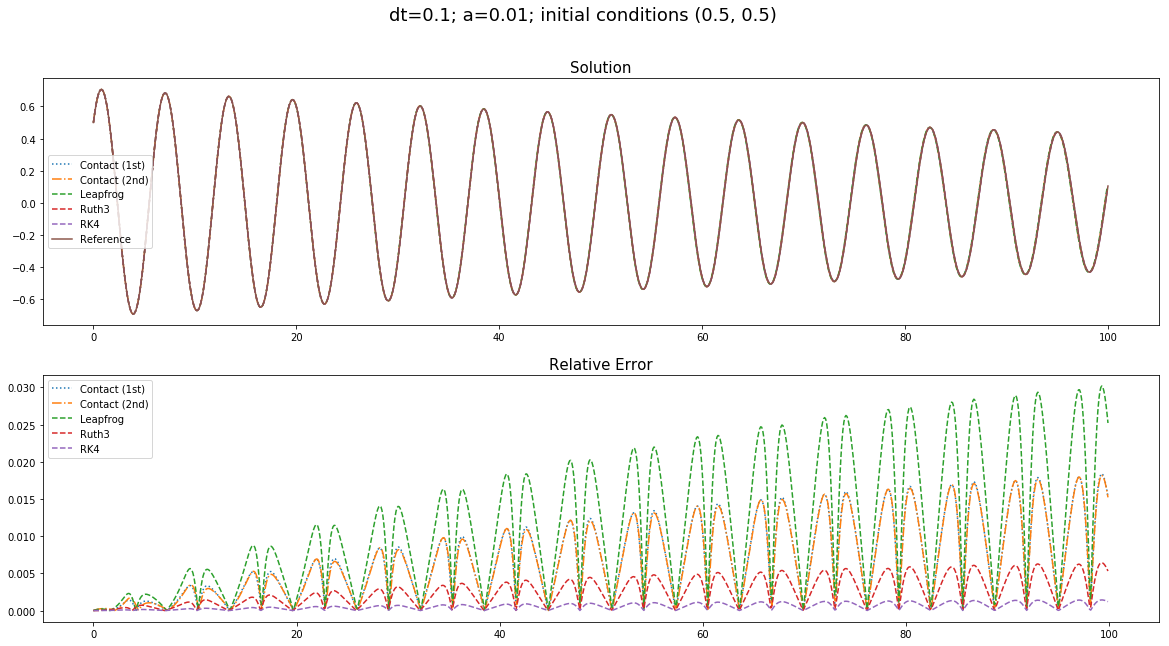

In [4]:
init = (.5, .5)
tspan = (0.0, 100.0)
a = 0.01
h = 0.1
delta = 10

cmp_plot(init, tspan, a, h, delta)

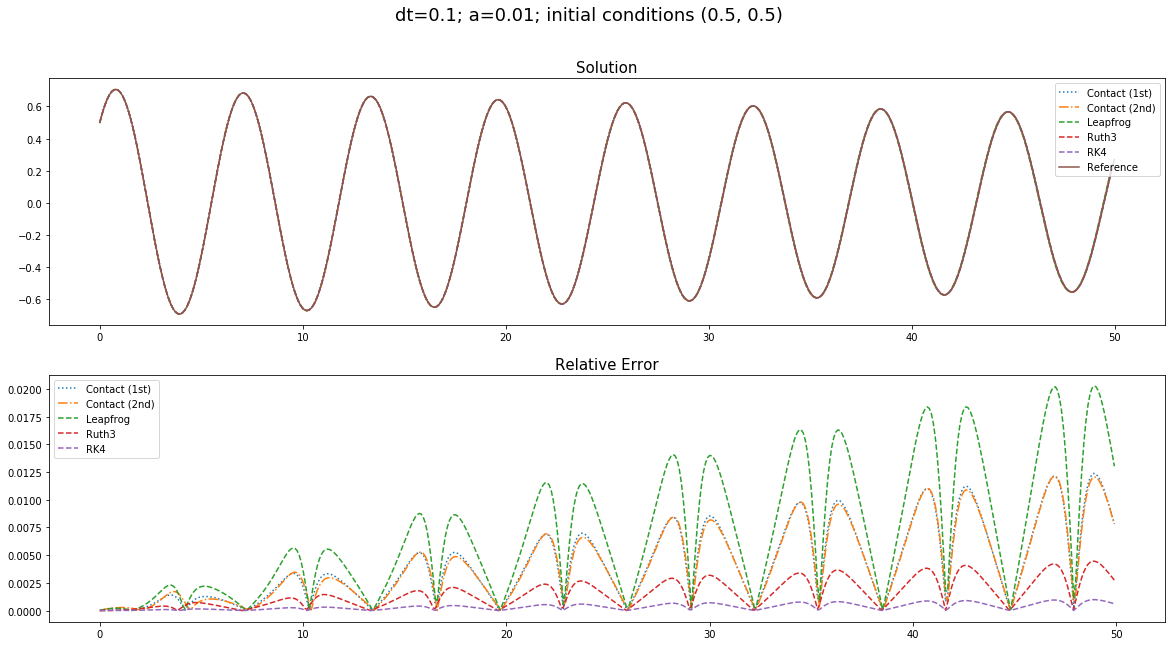

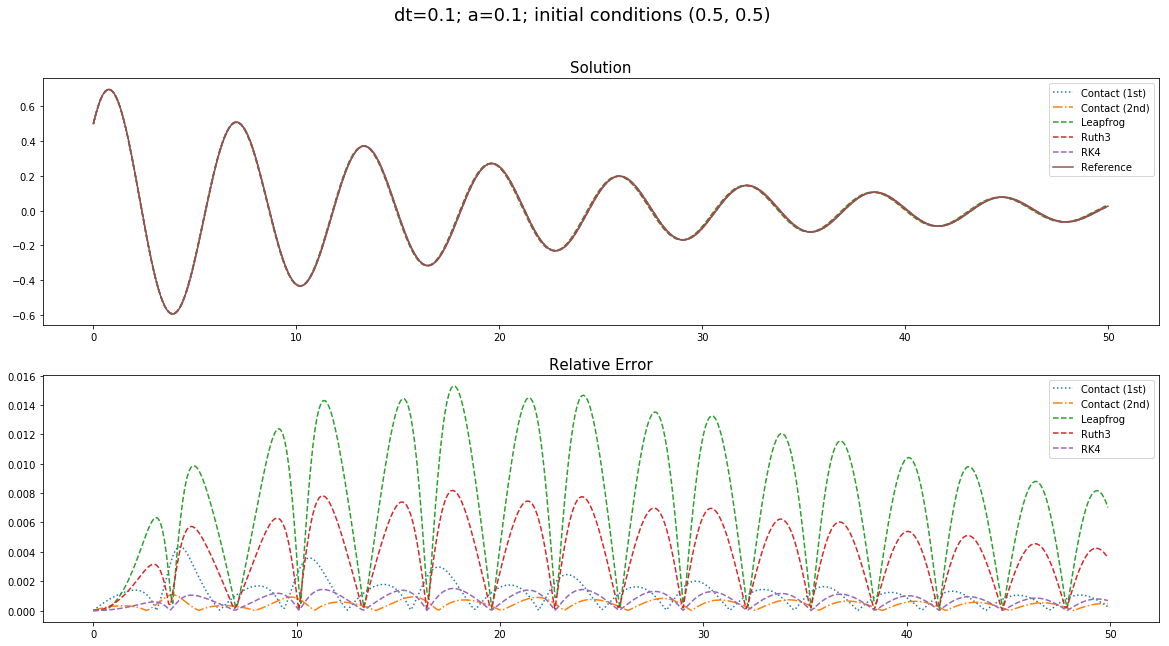

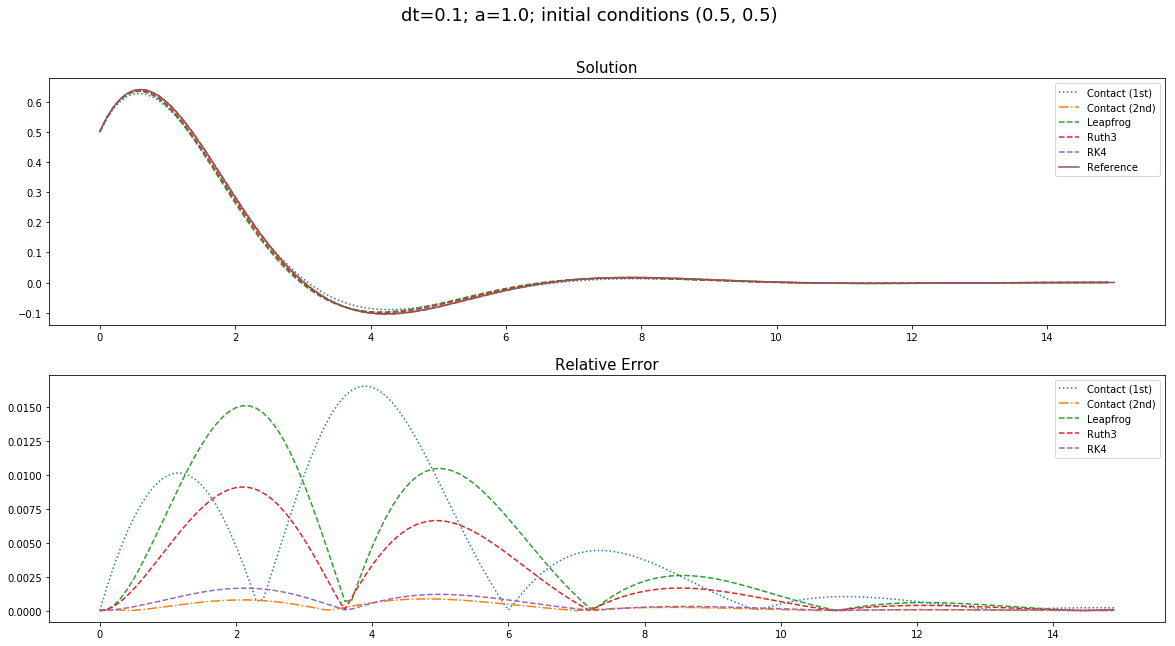

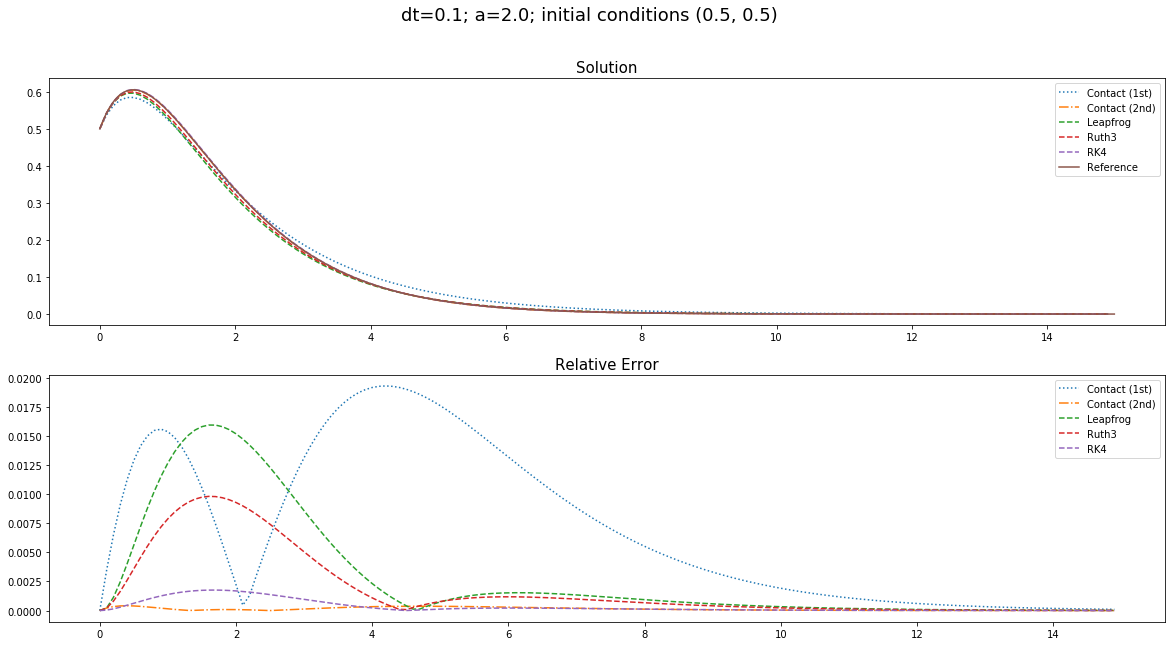

In [5]:
init = np.random.rand(2)
init = (.5,.5)
delta = 10
tspan = (0.0, 50.0)

for a in [.01, 0.1, 1.0, 2.0]:
    if a > .5:
        tspan = (0.0, 15.0)
    for h in [0.1]:
        cmp_plot(init, tspan, a, h, delta)